<a href="https://colab.research.google.com/github/Daniel-Benson-Poe/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/db_LS_DS_111_Exploratory_Data_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Loading and Exploring Datasets

This assignment is purposely open-ended. You will be asked to load datasets from the [UC-Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php). 

Even though you maybe using different datasets than your fellow classmates, try and be supportive and assist each other in the challenges that you are facing. You will only deepend your understanding of these topics as you work to assist one another. Many popular UCI datasets face similar data loading challenges.

Remember that the UCI datasets do not necessarily have a file type of `.csv` so it's important that you learn as much as you can about the dataset before you try and load it. See if you can look at the raw text of the file either locally or using the `!curl` shell command -or in some other way before you try and read it in as a dataframe. This will help you catch what would otherwise be unforseen problems.

Feel free to embellish this notebook with additional markdown cells,code cells, comments, graphs, etc. Whatever you think helps adequately address the questions.

## 1) Load a dataset from UCI (via its URL)

Please navigate to the home page and choose a dataset (other than the Adult dataset) from the "Most Popular" section on the right-hand side of the home page. Load the dataset via its URL and check the following (show your work):

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [0]:
# Imports
import pandas as pd
import numpy as np

In [152]:
# Look at the raw data
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data

M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
M,0.35,0.265,0.09,0.2255,0.0995,0.0485,0.07,7
F,0.53,0.42,0.135,0.677,0.2565,0.1415,0.21,9
M,0.44,0.365,0.125,0.516,0.2155,0.114,0.155,10
I,0.33,0.255,0.08,0.205,0.0895,0.0395,0.055,7
I,0.425,0.3,0.095,0.3515,0.141,0.0775,0.12,8
F,0.53,0.415,0.15,0.7775,0.237,0.1415,0.33,20
F,0.545,0.425,0.125,0.768,0.294,0.1495,0.26,16
M,0.475,0.37,0.125,0.5095,0.2165,0.1125,0.165,9
F,0.55,0.44,0.15,0.8945,0.3145,0.151,0.32,19
F,0.525,0.38,0.14,0.6065,0.194,0.1475,0.21,14
M,0.43,0.35,0.11,0.406,0.1675,0.081,0.135,10
M,0.49,0.38,0.135,0.5415,0.2175,0.095,0.19,11
F,0.535,0.405,0.145,0.6845,0.2725,0.171,0.205,10
F,0.47,0.355,0.1,0.4755,0.1675,0.0805,0.185,10
M,0.5,0.4,0.13,0.6645,0.258,0.133,0.24,12
I,0.355,0.28,0.085,0.2905,0.095,0.0395,0.115,7
F,0.44,0.34,0.1,0.451,0.188,0.087,0.13,10
M,0.365,0.295,0.08,0.2555,0.097,0.043,0.1,7
M,0.45,0.32,0.1,0.381,0.1705,0.075,0.115,9
M,0.355,0.28,0.095,0.2455,0.0955,0.062,0.075,11
I,0.38,0.275,0.1,0.2255,0.08,0.049,0.08

In [153]:
# Data is missing header names. Let's throw some together and set the url to 
# a variable
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.names

1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

   (c) Date received: December 1995


3. Past Usage:

   Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

   -- Test set performance (final 1044 examples, first 3133 used for training):
	24.86% Cascade-Correlation (no hidden nodes)
	26.25% Cascade-Correlation (5 hidden nodes)
	21.5%  C4.5
	 0.0%  Linear Discriminate Analysis
	 3.57% k=5 Nearest Neighbour
      (Problem encoded as a classification task)

   -- Data set samp

In [0]:
column_names = ['Sex', 'Length', 'Diameter', 'Height', 'Whole-Weight', 
                'Shucked-weight', 'Viscera-weight', 'Shell-weight', 'rings']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

In [0]:
# Read in the data
df = pd.read_csv(url, header=None, names=column_names)

In [156]:
# Look at the first five rows
df.head()

Sex  Length  Diameter  ...  Viscera-weight  Shell-weight  rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]

In [157]:
# Look at the last five rows
df.tail()

Sex  Length  Diameter  ...  Viscera-weight  Shell-weight  rings
4172   F   0.565     0.450  ...          0.2390        0.2490     11
4173   M   0.590     0.440  ...          0.2145        0.2605     10
4174   M   0.600     0.475  ...          0.2875        0.3080      9
4175   F   0.625     0.485  ...          0.2610        0.2960     10
4176   M   0.710     0.555  ...          0.3765        0.4950     12

[5 rows x 9 columns]

In [158]:
# Everything appears to be in order. Let's check for the correct number of rows
# and columns now.
df.shape

(4177, 9)

In [159]:
# These numbers also seem to be correct. Now check for null values. The UCI 
# states that there should not be any. Let's confirm that.
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole-Weight      0
Shucked-weight    0
Viscera-weight    0
Shell-weight      0
rings             0
dtype: int64

In [160]:
# Check the summary statistics of the dataset
df.describe()

Length     Diameter  ...  Shell-weight        rings
count  4177.000000  4177.000000  ...   4177.000000  4177.000000
mean      0.523992     0.407881  ...      0.238831     9.933684
std       0.120093     0.099240  ...      0.139203     3.224169
min       0.075000     0.055000  ...      0.001500     1.000000
25%       0.450000     0.350000  ...      0.130000     8.000000
50%       0.545000     0.425000  ...      0.234000     9.000000
75%       0.615000     0.480000  ...      0.329000    11.000000
max       0.815000     0.650000  ...      1.005000    29.000000

[8 rows x 8 columns]

## 2) Load a dataset from your local machine.
Choose a second dataset from the "Popular Datasets" listing on UCI, but this time download it to your local machine instead of reading it in via the URL. Upload the file to Google Colab using the files tab in the left-hand sidebar or by importing `files` from `google.colab` The following link will be a useful resource if you can't remember the syntax: <https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92>

- Answer all of the same bullet point questions from part 1 again on this new dataset. 


In [161]:
# Upload dataset through google.colab method
from google.colab import files
uploaded = files.upload()

In [162]:
# Read in the data and check the first five rows
df2 = pd.read_csv('iris.data')
df2.head()

5.1  3.5  1.4  0.2  Iris-setosa
0  4.9  3.0  1.4  0.2  Iris-setosa
1  4.7  3.2  1.3  0.2  Iris-setosa
2  4.6  3.1  1.5  0.2  Iris-setosa
3  5.0  3.6  1.4  0.2  Iris-setosa
4  5.4  3.9  1.7  0.4  Iris-setosa

In [163]:
# The data is missing column names, so let's create our list of column names 
# and re-read in the data.
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names

1. Title: Iris Plants Database
	Updated Sept 21 by C.Blake - Added discrepency information

2. Sources:
     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

3. Past Usage:
   - Publications: too many to mention!!!  Here are a few.
   1. Fisher,R.A. "The use of multiple measurements in taxonomic problems"
      Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions
      to Mathematical Statistics" (John Wiley, NY, 1950).
   2. Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
      (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   3. Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
      Structure and Classification Rule for Recognition in Partially Exposed
      Environments".  IEEE Transactions on Pattern Analysis and Machine
      Intelligence, Vol. PAMI-2, No. 1, 67-71.
      -- Results:
         -- very low misclassification rates (0% for t

In [0]:
column_names2 = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']

In [165]:
# Re-read in the data with the column names and look at the first five rows
df2 = pd.read_csv('iris.data', header=None, names=column_names2)
df2.head()

sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

In [166]:
# Look at the last five rows of dataset
df2.tail()

sepal-length  sepal-width  petal-length  petal-width           class
145           6.7          3.0           5.2          2.3  Iris-virginica
146           6.3          2.5           5.0          1.9  Iris-virginica
147           6.5          3.0           5.2          2.0  Iris-virginica
148           6.2          3.4           5.4          2.3  Iris-virginica
149           5.9          3.0           5.1          1.8  Iris-virginica

In [167]:
# Look at the data's shape
df2.shape

(150, 5)

In [168]:
# Check for null values
df2.isnull().sum()

sepal-length    0
sepal-width     0
petal-length    0
petal-width     0
class           0
dtype: int64

In [169]:
# Check the data's summary statistics
df2.describe()

sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000

## 3) Make Crosstabs of the Categorical Variables

Take whichever of the above datasets has more categorical variables and use crosstabs to tabulate the different instances of the categorical variables.


In [0]:
# Re-read in the first dataset
df = pd.read_csv(url, header=None, names=column_names)

In [171]:
df.head()

Sex  Length  Diameter  ...  Viscera-weight  Shell-weight  rings
0   M   0.455     0.365  ...          0.1010         0.150     15
1   M   0.350     0.265  ...          0.0485         0.070      7
2   F   0.530     0.420  ...          0.1415         0.210      9
3   M   0.440     0.365  ...          0.1140         0.155     10
4   I   0.330     0.255  ...          0.0395         0.055      7

[5 rows x 9 columns]

In [172]:
# Check datatypes of dataframe 1 for categorical data
df.dtypes

Sex                object
Length            float64
Diameter          float64
Height            float64
Whole-Weight      float64
Shucked-weight    float64
Viscera-weight    float64
Shell-weight      float64
rings               int64
dtype: object

In [173]:
# Check datatypes of dataframe 2 for categorical data
df2.dtypes

sepal-length    float64
sepal-width     float64
petal-length    float64
petal-width     float64
class            object
dtype: object

In [174]:
# Both datasets have only one object. Let's use a different dataset for this problem
# Start by checking the raw data
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1
57.0,1.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0,0
56.0,0.0,2.0,140.0,294.0,0.0,2.0,153.0,0.0,1.3,2.0,0.0,3.0,0
56.0,1.0,3.0,130.0,256.0,1.0,2.0,142.0,1.0,0.6,2.0,1.0,6.0,2
44.0,1.0,2.0,120.0,263.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,7.0,0
52.0,1.0,3.0,172.0,199.0,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0,0
57.0,1.0,3.0,150.0,168.0,0.0,0.0,174.0,0.0,1.6,1.0,0.0,3.0,0
48.0,1.0,2.0,110.0,229.0

In [175]:
# Check the column names
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/heart-disease.names

Publication Request: 
   >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
   This file describes the contents of the heart-disease directory.

   This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

   Each database has the same instance format.  While the databases have 76
   raw attributes, only 14 of them are actually used.  Thus I've taken the
   liberty of making 2 copies of each database: one with all the attributes
   and 1 with the 14 attributes actually used in past experiments.

   The authors of the databases have requested:

      ...that any publications resulting from the use of th

In [0]:
# Create a list of the column names we need
column_names3 = ['age', 'sex', 'chest-pain-type', 'resting-bp', 'cholesterol', 
                 'fasting-blood-sugar', 'resting-ecg', 'max-hr',
                 'exercise-induced-angina', 'oldpeak', 'slope', 
                 'colored-vessels', 'thal', 'diagnosis-of-heart-disease']
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

In [177]:
# Read in the data with our column names
df3 = pd.read_csv(url, header=None, names=column_names3)
df3.head()

age  sex  chest-pain-type  ...  colored-vessels  thal  diagnosis-of-heart-disease
0  63.0  1.0              1.0  ...              0.0   6.0                           0
1  67.0  1.0              4.0  ...              3.0   3.0                           2
2  67.0  1.0              4.0  ...              2.0   7.0                           1
3  37.0  1.0              3.0  ...              0.0   3.0                           0
4  41.0  0.0              2.0  ...              0.0   3.0                           0

[5 rows x 14 columns]

In [178]:
# Check datatypes of dataframe 3 for categorical data
df3.dtypes

age                           float64
sex                           float64
chest-pain-type               float64
resting-bp                    float64
cholesterol                   float64
fasting-blood-sugar           float64
resting-ecg                   float64
max-hr                        float64
exercise-induced-angina       float64
oldpeak                       float64
slope                         float64
colored-vessels                object
thal                           object
diagnosis-of-heart-disease      int64
dtype: object

In [179]:
# Look further into the diagnosis of heart disease column
df3['diagnosis-of-heart-disease'].value_counts()

0    164
1     55
2     36
3     35
4     13
Name: diagnosis-of-heart-disease, dtype: int64

In [180]:
# Look further into the chest pain type column
df3['chest-pain-type'].value_counts()

4.0    144
3.0     86
2.0     50
1.0     23
Name: chest-pain-type, dtype: int64

In [181]:
# Let's use the above two columns for our crosstab
cross1 = pd.crosstab(df3['diagnosis-of-heart-disease'], df3['chest-pain-type'])
cross1

chest-pain-type             1.0  2.0  3.0  4.0
diagnosis-of-heart-disease                    
0                            16   41   68   39
1                             5    6    9   35
2                             1    1    4   30
3                             0    2    4   29
4                             1    0    1   11

In [182]:
# Create a second crosstab
cross2 = pd.crosstab(df3['chest-pain-type'], df3['exercise-induced-angina'])
cross2

exercise-induced-angina  0.0  1.0
chest-pain-type                  
1.0                       19    4
2.0                       46    4
3.0                       75   11
4.0                       64   80

In [183]:
# Create a third crosstab
cross3 = pd.crosstab(df3['sex'], df3['chest-pain-type'])
cross3

chest-pain-type  1.0  2.0  3.0  4.0
sex                                
0.0                4   18   35   40
1.0               19   32   51  104

In [184]:
# Create a fourth crosstab
cross4 = pd.crosstab(df3['sex'], df3['diagnosis-of-heart-disease'])
cross4

diagnosis-of-heart-disease   0   1   2   3   4
sex                                           
0.0                         72   9   7   7   2
1.0                         92  46  29  28  11

## 4) Explore the distributions of the variables of the dataset using:
- Histograms
- Scatterplots
- Density Plots

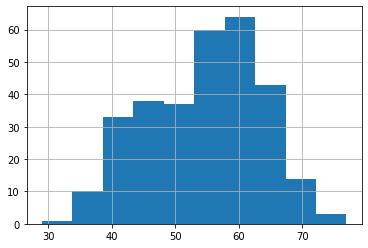

In [185]:
# Visualize the age column with a histogram
df3['age'].hist();

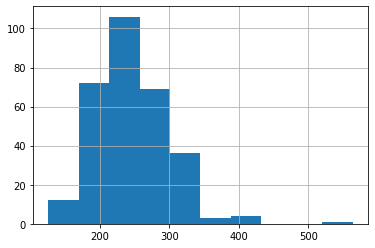

In [186]:
# Visualize the cholesterol column with a histogram
df3['cholesterol'].hist();

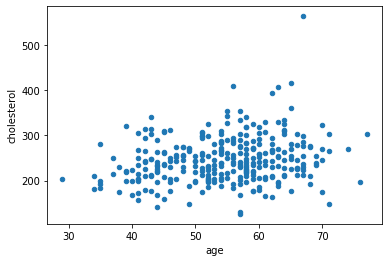

In [187]:
# Compare the age and cholesterol columns with a scatterplot
df3.plot.scatter('age', 'cholesterol');

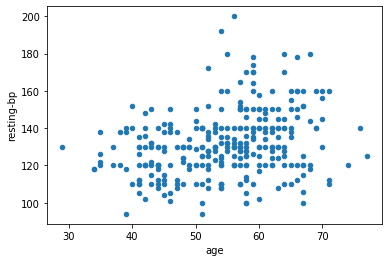

In [188]:
# Compare the age and resting-bp columns with a scatterplot
df3.plot.scatter('age', 'resting-bp');

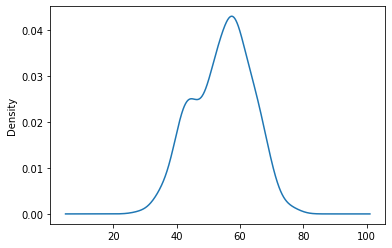

In [189]:
# Visualiz the age column with a density plot
df3['age'].plot.density();

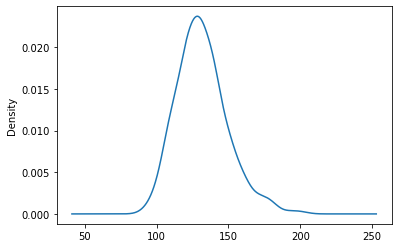

In [190]:
# Visualize the resting-bp column with a density plot
df3['resting-bp'].plot.density();

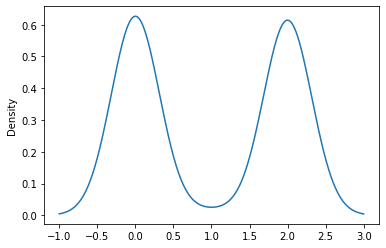

In [191]:
# Visualize the resting-ecg column with a density plot
df3['resting-ecg'].plot.density();

## 5) Create at least one visualization from a crosstab:

Remember that a crosstab is just a dataframe and can be manipulated in the same way by row index, column, index, or column/row/cell position.


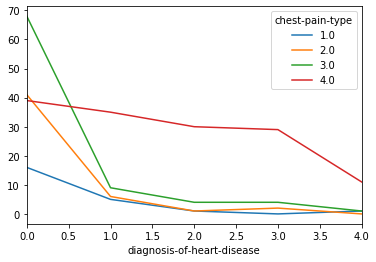

In [192]:
# Visualized our first crosstab with a line plot
cross1.plot();

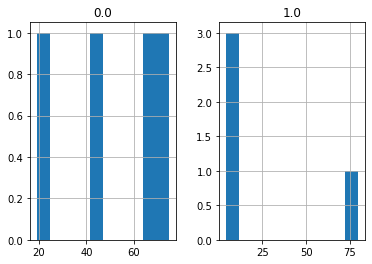

In [193]:
# Visualize our second crosstab with a histogram plot
cross2.hist();

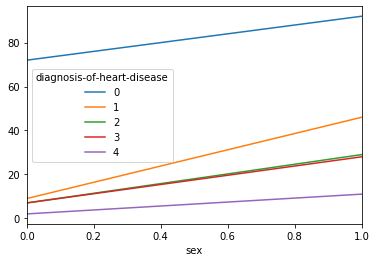

In [194]:
# Visualize our fourth crosstab with a line plot
cross4.plot();

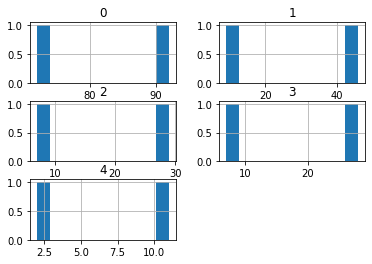

In [195]:
# Visualize our fourth crosstab with a histogram plot
cross4.hist();

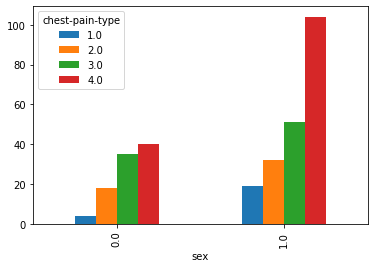

In [196]:
# Visualize our third crosstab with a bar plot
cross3.plot.bar();

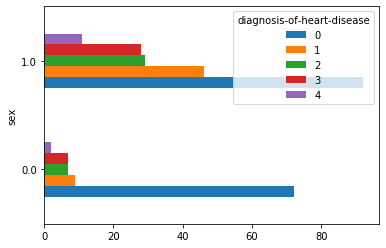

In [197]:
# Visualize our fourth crosstab with a bar plot
cross4.plot.barh();

## Stretch Goals 

The following additional study tasks are optional, they are intended to give you an opportunity to stretch yourself beyond the main requirements of the assignment. You can pick and choose from the below, you do not need to complete them in any particular order.

### - Practice Exploring other Datasets

### -  Try using the Seaborn plotting library's "Pairplot" functionality in order to explore all of the possible histograms and scatterplots of your dataset all at once:

[Seaborn Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

### - Turn some of the continuous variables into categorical variables by binning the values using:
- [pd.cut()](https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.cut.html)
- [pd.qcut()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html)
- <https://stackoverflow.com/questions/30211923/what-is-the-difference-between-pandas-qcut-and-pandas-cut>

And then use crosstabs to compare/visualize these binned variables against the other variables.


### - Other types and sources of data
Not all data comes in a nice single file - for example, image classification involves handling lots of image files. You still will probably want labels for them, so you may have tabular data in addition to the image blobs - and the images may be reduced in resolution and even fit in a regular csv as a bunch of numbers.

If you're interested in natural language processing and analyzing text, that is another example where, while it can be put in a csv, you may end up loading much larger raw data and generating features that can then be thought of in a more standard tabular fashion.

Overall you will in the course of learning data science deal with loading data in a variety of ways. Another common way to get data is from a database - most modern applications are backed by one or more databases, which you can query to get data to analyze. We'll cover this more in our data engineering unit.

How does data get in the database? Most applications generate logs - text files with lots and lots of records of each use of the application. Databases are often populated based on these files, but in some situations you may directly analyze log files. The usual way to do this is with command line (Unix) tools - command lines are intimidating, so don't expect to learn them all at once, but depending on your interests it can be useful to practice.

One last major source of data is APIs: https://github.com/toddmotto/public-apis

API stands for Application Programming Interface, and while originally meant e.g. the way an application interfaced with the GUI or other aspects of an operating system, now it largely refers to online services that let you query and retrieve data. You can essentially think of most of them as "somebody else's database" - you have (usually limited) access.

*Stretch goal* - research one of the above extended forms of data/data loading. See if you can get a basic example working in a notebook. Image, text, or (public) APIs are probably more tractable - databases are interesting, but there aren't many publicly accessible and they require a great deal of setup.

# Practice Exploring other Datasets

## Pittsburgh Bridges Dataset

In [198]:
# Check the raw data of the dataset
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version2

E1,M,3,CRAFTS,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
E2,A,25,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
E3,A,39,CRAFTS,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
E5,A,29,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,SHORT,S,WOOD
E6,M,23,CRAFTS,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD
E7,A,27,CRAFTS,HIGHWAY,SHORT,2,N,THROUGH,WOOD,MEDIUM,S,WOOD
E8,A,28,CRAFTS,AQUEDUCT,MEDIUM,1,N,THROUGH,IRON,SHORT,S,SUSPEN
E9,M,3,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,IRON,SHORT,S,SUSPEN
E10,A,39,CRAFTS,AQUEDUCT,?,1,N,DECK,WOOD,?,S,WOOD
E11,A,29,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,MEDIUM,S,WOOD
E12,A,39,CRAFTS,RR,?,2,N,DECK,WOOD,?,S,WOOD
E14,M,6,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,WOOD,MEDIUM,S,WOOD
E13,A,33,CRAFTS,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD
E15,A,28,CRAFTS,RR,?,2,N,THROUGH,WOOD,?,S,WOOD
E16,A,25,CRAFTS,HIGHWAY,MEDIUM,2,N,THROUGH,IRON,MEDIUM,S-F,SUSPEN
E17,M,4,CRAFTS,RR,MEDIUM,2,N,THROUGH,IRON,MEDIUM,?,SIMPLE-T
E18,A,28,CRAFTS,RR,MEDIUM,2,N,THROUGH,IRON,SHORT,S,SIMPLE-T
E19,A,29,CRAFTS,HIGHWAY,MEDIUM,2,N,TH

In [199]:
# Check the given attributes/column names of the dataset
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.names

1. Title: Pittsburgh bridges

2. Sources:
   -- Yoram Reich & Steven J. Fenves
      Department of Civil Engineering
      and
      Engineering Design Research Center
      Carnegie Mellon University
      Pittsburgh, PA 15213

      Compiled from various sources.

   -- Donor: Yoram Reich (yoram.reich@cs.cmu.edu)
   -- Date: 1 August 1990

3. Past Usage:

   -- Reich & Fenves (1989). Incremental Learning for Capturing Design 
      Expertise. Technical Report: EDRC 12-34-89, Engineering Design
      Research Center, Carnegie Mellon University, Pittsburgh, PA.
      -- Qualitative results and runs with original ordering of examples.
         using COBWEB.

   -- Reich (1989). Converging to ``Ideal'' Design Knowledge by Learning,
      Proceedings of the First International Workshop on Formal Methods in
      Engineering Design, pp: 330-349, Colorado Springs, CO, January 1990.
      -- Describes a new design method with Bridger (variant of COBWEB) using
	 this domain. (Also an EDRC rep

In [0]:
# Create column names and a variable that holds the dataset's url
bridge_columns = ['identifier', 'river', 'location', 'erected', 'purpose', 
                  'length', 'lanes', 'clear-g', 't-or-d', 'material', 'span', 
                  'rel-l', 'type']
bridge_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/bridges/bridges.data.version2'

In [201]:
# Read in dataset and view first five rows
pitts_bridges = pd.read_csv(bridge_url, header=None, names=bridge_columns)
pitts_bridges.head()

identifier river location erected  ... material   span rel-l  type
0         E1     M        3  CRAFTS  ...     WOOD  SHORT     S  WOOD
1         E2     A       25  CRAFTS  ...     WOOD  SHORT     S  WOOD
2         E3     A       39  CRAFTS  ...     WOOD      ?     S  WOOD
3         E5     A       29  CRAFTS  ...     WOOD  SHORT     S  WOOD
4         E6     M       23  CRAFTS  ...     WOOD      ?     S  WOOD

[5 rows x 13 columns]

In [202]:
# View the last five rows
pitts_bridges.tail()

identifier river location erected  ... material    span rel-l  type
103        E84     A       24  MODERN  ...    STEEL  MEDIUM     F  ARCH
104        E91     O       44  MODERN  ...    STEEL    LONG     F  ARCH
105        E90     M        7  MODERN  ...    STEEL    LONG     F  ARCH
106       E100     O       43  MODERN  ...        ?       ?     F     ?
107       E109     A       28  MODERN  ...        ?       ?     F     ?

[5 rows x 13 columns]

In [203]:
# Check the dataframe's shape 
pitts_bridges.shape

(108, 13)

In [204]:
# Look into the statistical summary of the dataframe
pitts_bridges.describe()

identifier river location erected  ... material    span rel-l      type
count         108   108      108     108  ...      108     108   108       108
unique        108     4       55       4  ...        4       4     4         8
top           E89     A       28  MATURE  ...    STEEL  MEDIUM     F  SIMPLE-T
freq            1    49        5      54  ...       79      53    58        44

[4 rows x 13 columns]

In [205]:
# Look at the datatypes of each column in the dataframe
pitts_bridges.dtypes

identifier    object
river         object
location      object
erected       object
purpose       object
length        object
lanes         object
clear-g       object
t-or-d        object
material      object
span          object
rel-l         object
type          object
dtype: object

In [206]:
# Check for null values in the dataframe
pitts_bridges.isnull().sum()

identifier    0
river         0
location      0
erected       0
purpose       0
length        0
lanes         0
clear-g       0
t-or-d        0
material      0
span          0
rel-l         0
type          0
dtype: int64

In [207]:
# Create our first crosstab
erected_by_length = pd.crosstab(pitts_bridges['erected'], pitts_bridges['length'])
erected_by_length

length     ?  LONG  MEDIUM  SHORT
erected                          
CRAFTS     7     0      10      1
EMERGING   6     1       8      0
MATURE    10    15      24      5
MODERN     4     5       6      6

In [0]:
# A quick note: We have a question mark, which is indicative of empty values not identified 
# by the isnull command

In [209]:
# Create a second crosstab
erected_by_type = pd.crosstab(pitts_bridges['erected'], pitts_bridges['type'])
erected_by_type

type      ?  ARCH  CANTILEV  CONT-T  NIL  SIMPLE-T  SUSPEN  WOOD
erected                                                         
CRAFTS    0     0         0       0    0         2       3    13
EMERGING  0     1         0       0    0        10       2     2
MATURE    0     7         9       2    1        28       6     1
MODERN    2     5         2       8    0         4       0     0

In [210]:
# Create a third crosstab
erected_by_material = pd.crosstab(pitts_bridges['erected'], pitts_bridges['material'])
erected_by_material

material  ?  IRON  STEEL  WOOD
erected                       
CRAFTS    0     5      0    13
EMERGING  0     3     10     2
MATURE    0     3     50     1
MODERN    2     0     19     0

### Visualizations

In [211]:
# Check what we have to look at
pitts_bridges.head()

identifier river location erected  ... material   span rel-l  type
0         E1     M        3  CRAFTS  ...     WOOD  SHORT     S  WOOD
1         E2     A       25  CRAFTS  ...     WOOD  SHORT     S  WOOD
2         E3     A       39  CRAFTS  ...     WOOD      ?     S  WOOD
3         E5     A       29  CRAFTS  ...     WOOD  SHORT     S  WOOD
4         E6     M       23  CRAFTS  ...     WOOD      ?     S  WOOD

[5 rows x 13 columns]

In [212]:
# We have a lot of categorical data.
pitts_bridges.dtypes

identifier    object
river         object
location      object
erected       object
purpose       object
length        object
lanes         object
clear-g       object
t-or-d        object
material      object
span          object
rel-l         object
type          object
dtype: object

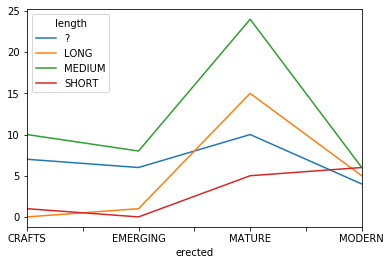

In [213]:
# Let's use crosstabs to visualize things
# Line graph
erected_by_length.plot();

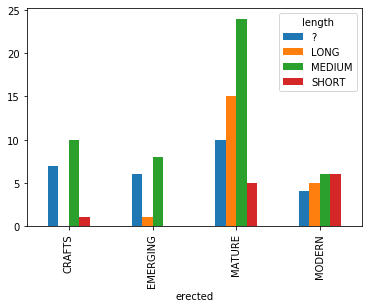

In [214]:
# Bar graph
erected_by_length.plot.bar();

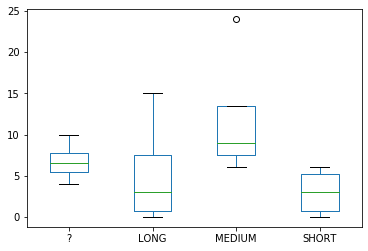

In [215]:
# Box plot
erected_by_length.plot.box();

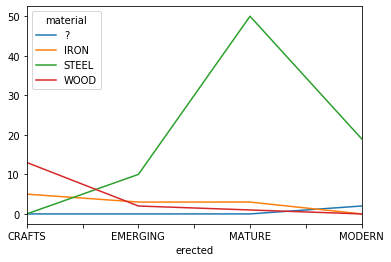

In [216]:
# Now our second crosstab
# Line graph
erected_by_material.plot();

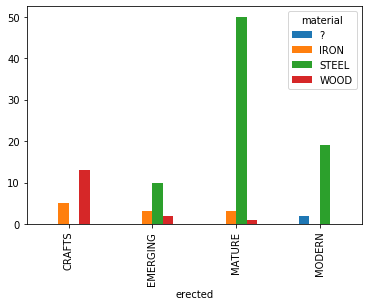

In [217]:
# Bar Graph
erected_by_material.plot.bar();

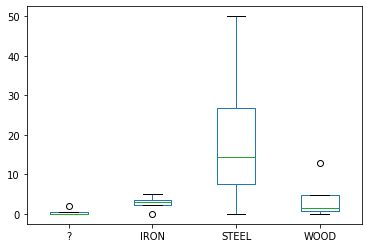

In [218]:
# Box plot
erected_by_material.plot.box();

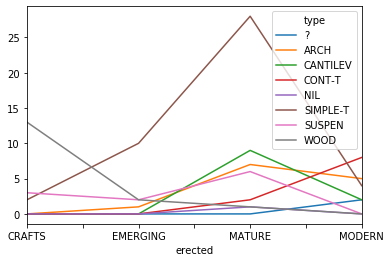

In [219]:
# Now our third crosstab
erected_by_type.plot();

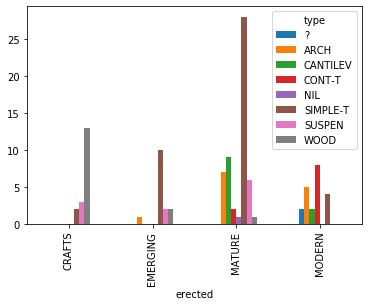

In [220]:
erected_by_type.plot.bar();

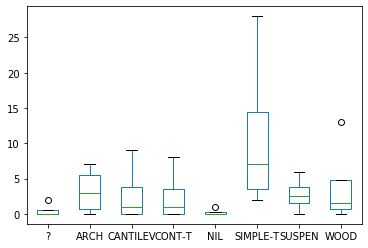

In [221]:
erected_by_type.plot.box();

## Census Income Dataset

In [222]:
# Check the raw data
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

|1x3 Cross validator
25, Private, 226802, 11th, 7, Never-married, Machine-op-inspct, Own-child, Black, Male, 0, 0, 40, United-States, <=50K.
38, Private, 89814, HS-grad, 9, Married-civ-spouse, Farming-fishing, Husband, White, Male, 0, 0, 50, United-States, <=50K.
28, Local-gov, 336951, Assoc-acdm, 12, Married-civ-spouse, Protective-serv, Husband, White, Male, 0, 0, 40, United-States, >50K.
44, Private, 160323, Some-college, 10, Married-civ-spouse, Machine-op-inspct, Husband, Black, Male, 7688, 0, 40, United-States, >50K.
18, ?, 103497, Some-college, 10, Never-married, ?, Own-child, White, Female, 0, 0, 30, United-States, <=50K.
34, Private, 198693, 10th, 6, Never-married, Other-service, Not-in-family, White, Male, 0, 0, 30, United-States, <=50K.
29, ?, 227026, HS-grad, 9, Never-married, ?, Unmarried, Black, Male, 0, 0, 40, United-States, <=50K.
63, Self-emp-not-inc, 104626, Prof-school, 15, Married-civ-spouse, Prof-specialty, Husband, White, Male, 3103, 0, 32, United-States, >50K.
24, 

In [223]:
# Check the attributes/column names
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [0]:
# Create our list of names
census_income_names = ['age', 'workclass', 'final_weight', 'education', 
                       'education-num', 'marital-status', 'occupation', 
                       'relationship', 'race', 'sex', 'capital-gain', 
                       'capital-loss', 'hours-per-week', 'native-country', 'salary']
census_income_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test'

In [225]:
# Read in dataset and view first five rows
census_income = pd.read_csv(census_income_url, header=None, names=census_income_names)
census_income.head()

age   workclass  ...  native-country   salary
0  |1x3 Cross validator         NaN  ...             NaN      NaN
1                    25     Private  ...   United-States   <=50K.
2                    38     Private  ...   United-States   <=50K.
3                    28   Local-gov  ...   United-States    >50K.
4                    44     Private  ...   United-States    >50K.

[5 rows x 15 columns]

In [226]:
# The first row is completely unneeded and hs nothing to do with the rest of the 
# dataset. After doing some research I found a method to fix the issue. This 
# cell rereads in the dataset minus the first row.
census_income = pd.read_csv(census_income_url, header=None, names=census_income_names, skiprows=1)
census_income.head()

age   workclass  final_weight  ... hours-per-week  native-country   salary
0   25     Private        226802  ...             40   United-States   <=50K.
1   38     Private         89814  ...             50   United-States   <=50K.
2   28   Local-gov        336951  ...             40   United-States    >50K.
3   44     Private        160323  ...             40   United-States    >50K.
4   18           ?        103497  ...             30   United-States   <=50K.

[5 rows x 15 columns]

In [227]:
# Check the last five rows of the dataframe
census_income.tail()

age      workclass  ...  native-country   salary
16276   39        Private  ...   United-States   <=50K.
16277   64              ?  ...   United-States   <=50K.
16278   38        Private  ...   United-States   <=50K.
16279   44        Private  ...   United-States   <=50K.
16280   35   Self-emp-inc  ...   United-States    >50K.

[5 rows x 15 columns]

In [228]:
# Check the dataframe's shape
census_income.shape

(16281, 15)

In [229]:
# Check the summary statistics of the dataframe
census_income.describe()

age  final_weight  ...  capital-loss  hours-per-week
count  16281.000000  1.628100e+04  ...  16281.000000    16281.000000
mean      38.767459  1.894357e+05  ...     87.899269       40.392236
std       13.849187  1.057149e+05  ...    403.105286       12.479332
min       17.000000  1.349200e+04  ...      0.000000        1.000000
25%       28.000000  1.167360e+05  ...      0.000000       40.000000
50%       37.000000  1.778310e+05  ...      0.000000       40.000000
75%       48.000000  2.383840e+05  ...      0.000000       45.000000
max       90.000000  1.490400e+06  ...   3770.000000       99.000000

[8 rows x 6 columns]

In [230]:
# Check the data types of each column
census_income.dtypes

age                int64
workclass         object
final_weight       int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [231]:
# Check dataframe for null values
census_income.isnull().sum()

age               0
workclass         0
final_weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [232]:
# Create our first crosstab
education_by_occupation = pd.crosstab(census_income['education'], census_income['occupation'])
education_by_occupation

occupation       ?   Adm-clerical  ...   Tech-support   Transport-moving
education                          ...                                  
 10th           48             21  ...              2                 45
 11th           62             33  ...              3                 42
 12th           18             14  ...              1                 17
 1st-4th         6              6  ...              0                  4
 5th-6th        11              2  ...              0                 10
 7th-8th        38              9  ...              1                 27
 9th            18              6  ...              1                 26
 Assoc-acdm     25             88  ...             43                  9
 Assoc-voc      22            102  ...             55                 15
 Bachelors      80            259  ...            116                 31
 Doctorate       3              1  ...              5                  1
 HS-grad       279            682  ...            111                398
 Masters        19             37  ...             24                  4
 Preschool       5              1  ...              0                  2
 Prof-school     6              3  ...              3                  0
 Some-college  326            577  ...            153                127

[16 rows x 15 columns]

In [233]:
# Create our second crosstab
education_by_marital_status = pd.crosstab(census_income['education'], census_income['marital-status'])
education_by_marital_status

marital-status   Divorced   Married-AF-spouse  ...   Separated   Widowed
education                                      ...                      
 10th                  52                   1  ...          26        30
 11th                  62                   0  ...          31        20
 12th                  24                   0  ...           5         8
 1st-4th                7                   0  ...           3         8
 5th-6th               11                   0  ...          13         7
 7th-8th               28                   0  ...          16        32
 9th                   34                   0  ...           8        12
 Assoc-acdm            77                   0  ...          13        13
 Assoc-voc            127                   1  ...          22        22
 Bachelors            297                   2  ...          44        43
 Doctorate             23                   1  ...           4         6
 HS-grad              803                   2  ...         201       219
 Masters              134                   0  ...          19        19
 Preschool              1                   0  ...           2         2
 Prof-school           19                   1  ...           1         5
 Some-college         491                   6  ...          97        79

[16 rows x 7 columns]

In [234]:
# Create third crosstab
education_by_sex = pd.crosstab(census_income['education'], census_income['sex']).T
education_by_sex

education   10th   11th   12th  ...   Preschool   Prof-school   Some-college
sex                             ...                                         
 Female      162    218     67  ...           8            40           1372
 Male        294    419    157  ...          24           218           2215

[2 rows x 16 columns]

In [235]:
# Create fourth crosstab
education_by_salary = pd.crosstab(census_income['education'], census_income['salary']).T
education_by_salary

education   10th   11th   12th  ...   Preschool   Prof-school   Some-college
salary                          ...                                         
 <=50K.      431    605    209  ...          31            64           2911
 >50K.        25     32     15  ...           1           194            676

[2 rows x 16 columns]

In [236]:
# Create fifth crosstab
sex_by_salary = pd.crosstab(census_income['sex'], census_income['salary'])
sex_by_salary

salary    <=50K.   >50K.
sex                     
 Female     4831     590
 Male       7604    3256

### Visualizations

In [237]:
# Look into our dataframe to find what we want to visualize
census_income.head()

age   workclass  final_weight  ... hours-per-week  native-country   salary
0   25     Private        226802  ...             40   United-States   <=50K.
1   38     Private         89814  ...             50   United-States   <=50K.
2   28   Local-gov        336951  ...             40   United-States    >50K.
3   44     Private        160323  ...             40   United-States    >50K.
4   18           ?        103497  ...             30   United-States   <=50K.

[5 rows x 15 columns]

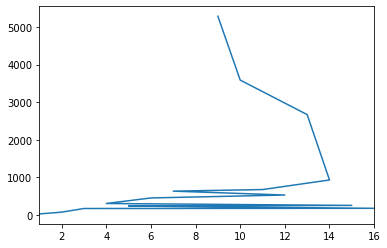

In [238]:
census_income['education-num'].value_counts().plot();

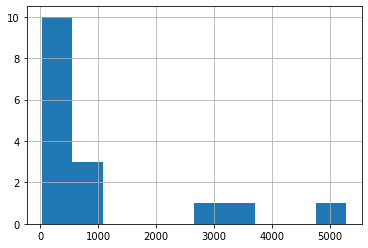

In [239]:
census_income['education-num'].value_counts().hist();

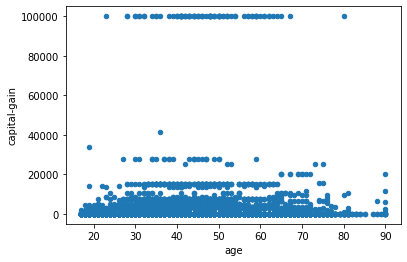

In [240]:
census_income.plot.scatter('age', 'capital-gain');

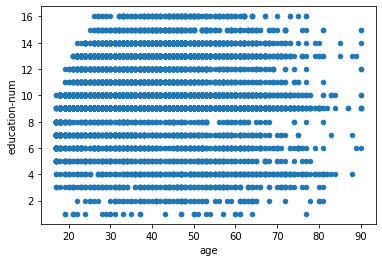

In [241]:
census_income.plot.scatter('age', 'education-num');

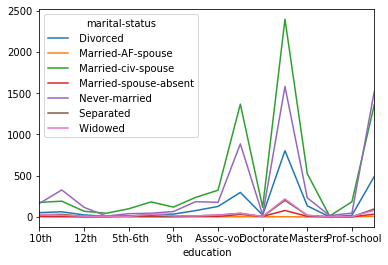

In [242]:
# Let's visualize our crosstabs now!
education_by_marital_status.plot();

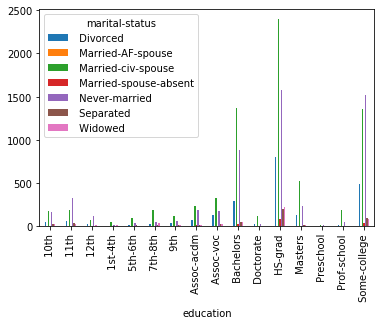

In [243]:
education_by_marital_status.plot.bar();

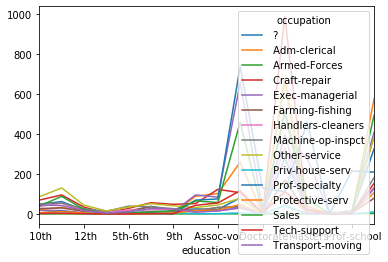

In [244]:
education_by_occupation.plot();

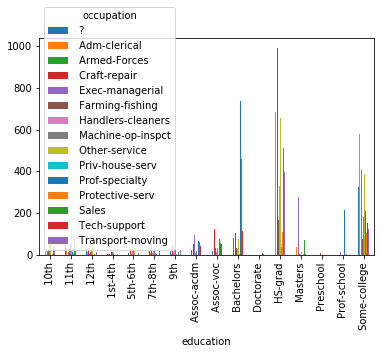

In [245]:
education_by_occupation.plot.bar();

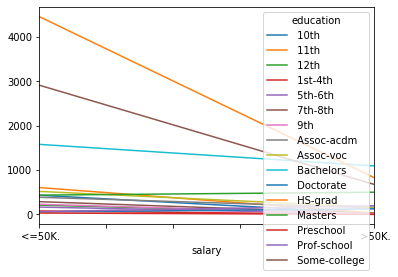

In [246]:
education_by_salary.plot();

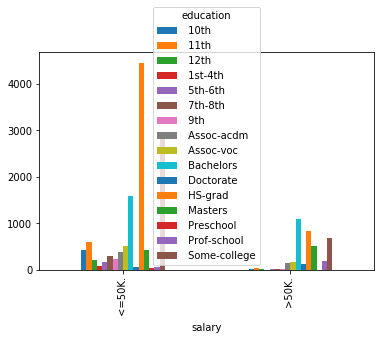

In [247]:
education_by_salary.plot.bar();

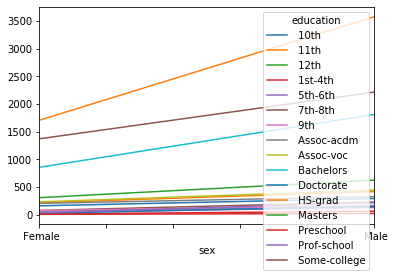

In [248]:
education_by_sex.plot();

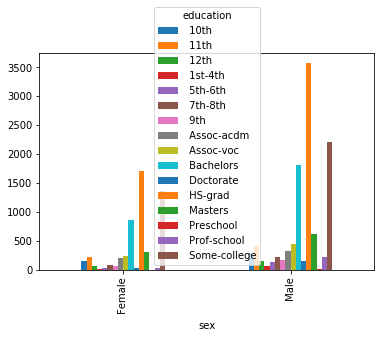

In [249]:
education_by_sex.plot.bar();

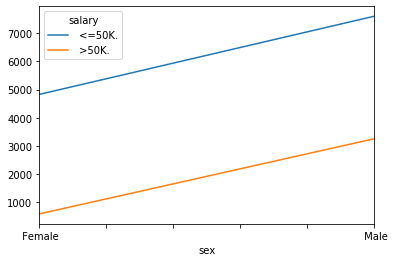

In [250]:
sex_by_salary.plot();

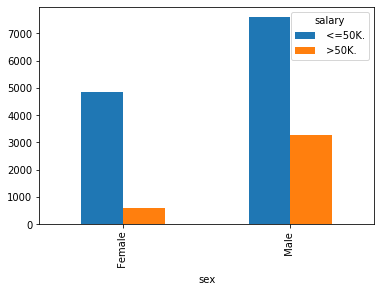

In [251]:
sex_by_salary.plot.bar();

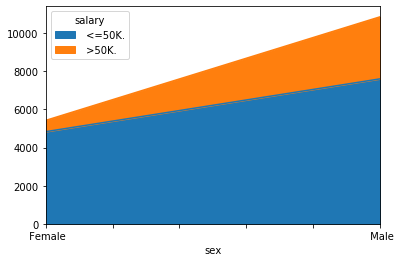

In [252]:
sex_by_salary.plot.area();

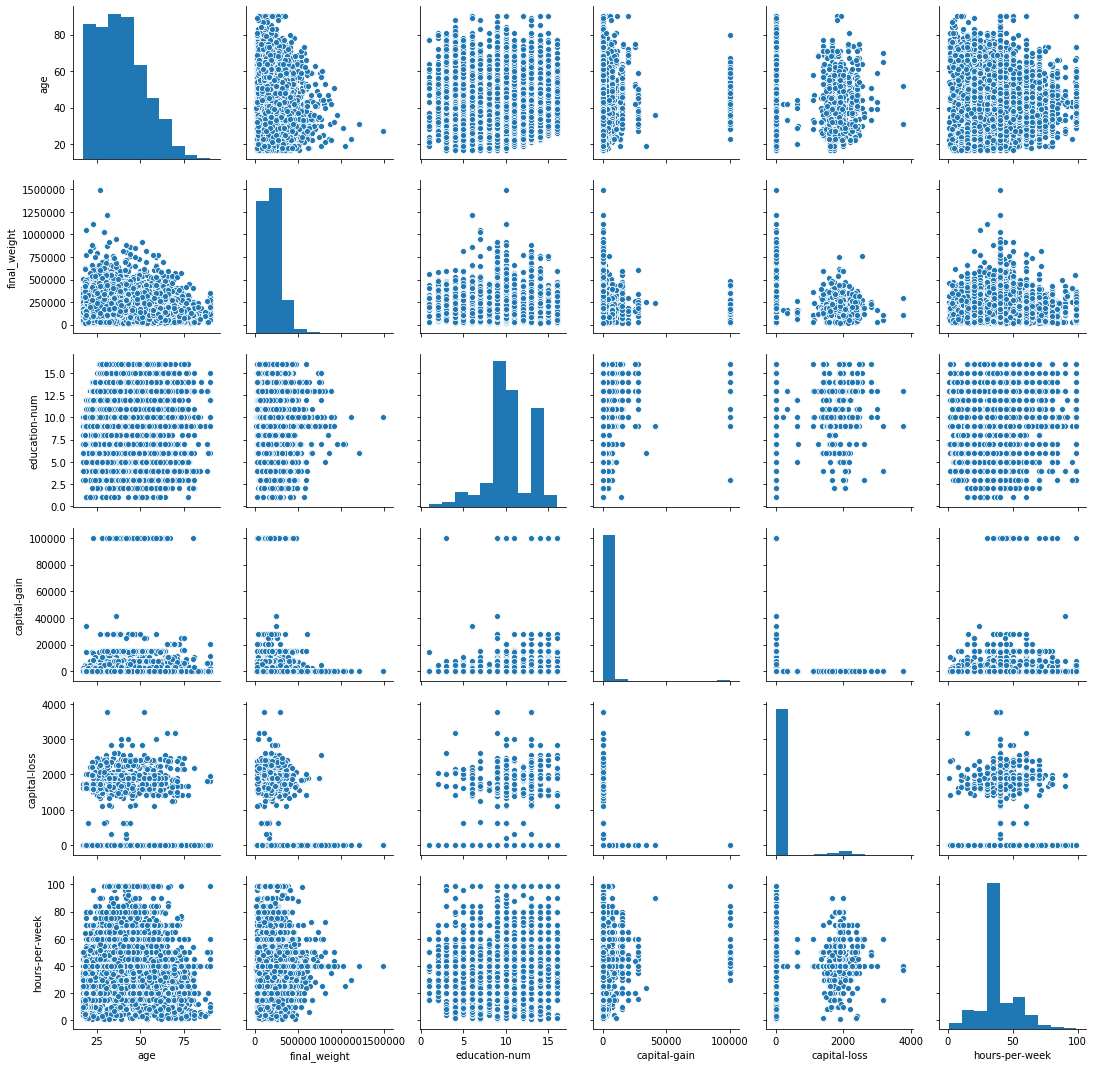

In [253]:
# Let's import seaborn and use the pairplot function now on this dataframe
import seaborn as sbn
sbn.pairplot(census_income);

### Using cut/qcut on a dataframe

In [254]:
# Look at the raw data
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data

24,2,3,3,1,1,2,3,0,1
45,1,3,10,1,1,3,4,0,1
43,2,3,7,1,1,3,4,0,1
42,3,2,9,1,1,3,3,0,1
36,3,3,8,1,1,3,2,0,1
19,4,4,0,1,1,3,3,0,1
38,2,3,6,1,1,3,2,0,1
21,3,3,1,1,0,3,2,0,1
27,2,3,3,1,1,3,4,0,1
45,1,1,8,1,1,2,2,1,1
38,1,3,2,1,0,3,3,1,1
42,1,4,4,1,1,1,3,0,1
44,4,4,1,1,0,1,4,0,1
42,2,4,1,1,0,3,3,0,1
38,3,4,2,1,1,2,3,0,1
26,2,4,0,1,1,4,1,0,1
48,1,1,7,1,1,2,4,0,1
39,2,2,6,1,1,2,4,0,1
37,2,2,8,1,1,2,3,0,1
39,2,1,5,1,1,2,1,1,1
26,3,4,1,1,0,4,1,0,1
24,3,4,0,1,0,3,1,0,1
46,4,4,1,0,1,1,4,0,1
39,4,4,1,1,1,1,4,0,1
48,4,4,5,1,1,1,4,0,1
40,2,4,8,1,1,3,3,0,1
38,4,4,1,1,0,1,4,0,1
29,4,4,0,1,0,1,4,0,1
24,4,4,0,1,0,2,2,0,1
43,1,2,8,1,1,2,4,0,1
31,3,4,2,1,1,1,4,0,1
31,4,4,2,1,1,3,2,0,1
26,2,4,0,1,0,1,2,0,1
33,2,2,2,1,1,3,1,0,1
24,2,3,1,1,1,3,3,0,1
42,1,3,9,1,1,3,2,1,1
43,1,2,8,1,0,3,1,0,1
25,3,3,4,1,1,3,2,0,1
42,2,2,3,1,1,3,4,0,1
28,2,2,1,1,1,2,4,0,1
28,1,1,3,1,1,3,1,0,1
47,2,3,0,1,0,1,3,0,1
48,2,4,2,1,1,1,3,0,1
40,4,4,2,0,1,1,4,0,1
28,2,2,1,1,1,3,2,0,1
25,1,4,1,1,1,2,1,0,1
32,4,4,2,1,1,2,3,0,1
45,4,4,0,1,1

In [255]:
# Check the attribute names
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.names

1. Title: Contraceptive Method Choice

2. Sources:
   (a) Origin:  This dataset is a subset of the 1987 National Indonesia
                Contraceptive Prevalence Survey
   (b) Creator: Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (c) Date:    June 7, 1997

3. Past Usage:
   Lim, T.-S., Loh, W.-Y. & Shih, Y.-S. (1999). A Comparison of
   Prediction Accuracy, Complexity, and Training Time of Thirty-three
   Old and New Classification Algorithms. Machine Learning. Forthcoming.
   (ftp://ftp.stat.wisc.edu/pub/loh/treeprogs/quest1.7/mach1317.pdf or
   (http://www.stat.wisc.edu/~limt/mach1317.pdf)

4. Relevant Information:
   This dataset is a subset of the 1987 National Indonesia Contraceptive
   Prevalence Survey. The samples are married women who were either not 
   pregnant or do not know if they were at the time of interview. The 
   problem is to predict the current contraceptive method choice 
   (no use, long-term methods, or short-term m

In [0]:
# Create list of column names
df_columns = ['wife-age', 'wife-ed', 'husb-ed', 'numb-child-born', 'wife-relig',
              'wife-working', 'husb-occup', 'stand-living-index', 'media-exposure',
              'contraceptive-method']
contra_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/cmc/cmc.data'

In [257]:
# Read in the data and look at the first five rows
contraceptive_df = pd.read_csv(contra_url, header=None, names=df_columns)
contraceptive_df.head()

wife-age  wife-ed  ...  media-exposure  contraceptive-method
0        24        2  ...               0                     1
1        45        1  ...               0                     1
2        43        2  ...               0                     1
3        42        3  ...               0                     1
4        36        3  ...               0                     1

[5 rows x 10 columns]

In [258]:
# Look at the value counts to get a feel for the numbers
contraceptive_df['wife-age'].value_counts()

25    80
26    69
32    64
30    64
28    63
35    62
24    61
22    59
27    59
29    59
36    57
33    55
37    51
34    50
21    48
31    46
23    44
38    44
47    43
45    41
42    40
44    39
43    34
39    34
40    34
41    34
48    30
20    28
49    23
46    22
19    18
17     8
18     7
16     3
Name: wife-age, dtype: int64

In [0]:
# Create test1 to determine if qcut or cut would be better
test = pd.qcut(contraceptive_df['wife-age'], 8)

In [260]:
test.value_counts()

(15.999, 23.0]    215
(23.0, 26.0]      210
(35.0, 39.0]      186
(39.0, 44.0]      181
(26.0, 29.0]      181
(29.0, 32.0]      174
(32.0, 35.0]      167
(44.0, 49.0]      159
Name: wife-age, dtype: int64

In [0]:
# Create test2 to determine if qcut or cut would be better
test2 = pd.cut(contraceptive_df['wife-age'], 8)

In [262]:
test2.value_counts()

(24.25, 28.375]     271
(28.375, 32.5]      233
(32.5, 36.625]      224
(20.125, 24.25]     212
(36.625, 40.75]     163
(44.875, 49.0]      159
(40.75, 44.875]     147
(15.967, 20.125]     64
Name: wife-age, dtype: int64

In [0]:
contra_quantiles = []

In [264]:
# Looking at the differences between qcut and cut, I think this dataframe is 
# organized using qcut
# Let's set the column  to our qcut now
contraceptive_df['wife-age'] = pd.cut(contraceptive_df['wife-age'], 8)
contraceptive_df.head()

wife-age  wife-ed  ...  media-exposure  contraceptive-method
0  (20.125, 24.25]        2  ...               0                     1
1   (44.875, 49.0]        1  ...               0                     1
2  (40.75, 44.875]        2  ...               0                     1
3  (40.75, 44.875]        3  ...               0                     1
4   (32.5, 36.625]        3  ...               0                     1

[5 rows x 10 columns]

In [265]:
contraceptive_df['wife-age'].value_counts()

(24.25, 28.375]     271
(28.375, 32.5]      233
(32.5, 36.625]      224
(20.125, 24.25]     212
(36.625, 40.75]     163
(44.875, 49.0]      159
(40.75, 44.875]     147
(15.967, 20.125]     64
Name: wife-age, dtype: int64

In [266]:
# Let's look at other columns to see what else we can find
contraceptive_df['wife-ed'].value_counts()

4    577
3    410
2    334
1    152
Name: wife-ed, dtype: int64

In [267]:
contraceptive_df['numb-child-born'].value_counts()

2     276
1     276
3     259
4     197
5     135
0      97
6      92
7      49
8      47
9      16
11     11
10     11
12      4
13      2
16      1
Name: numb-child-born, dtype: int64

In [268]:
contraceptive_df['husb-occup'].value_counts()

3    585
1    436
2    425
4     27
Name: husb-occup, dtype: int64

In [269]:
contraceptive_df['media-exposure'].value_counts()

0    1364
1     109
Name: media-exposure, dtype: int64

In [0]:
# Let's clean up the numb-child-born column
# First determine which cut method works best
test3 = pd.qcut(contraceptive_df['numb-child-born'], 4)

In [271]:
# Create test3 to determine if qcut or cut would be better
test3.value_counts()

(1.0, 3.0]       535
(-0.001, 1.0]    373
(4.0, 16.0]      368
(3.0, 4.0]       197
Name: numb-child-born, dtype: int64

In [0]:
# Create test4 to determine if qcut or cut would be better
test4 = pd.cut(contraceptive_df['numb-child-born'], 4)

In [273]:
test4.value_counts()

(-0.016, 4.0]    1105
(4.0, 8.0]        323
(8.0, 12.0]        42
(12.0, 16.0]        3
Name: numb-child-born, dtype: int64

In [0]:
# Our best option will definitely be the qcut
# Let's set our column to the new categorical data
contraceptive_df['numb-child-born'] = pd.qcut(contraceptive_df['numb-child-born'], 4)

In [275]:
contraceptive_df.head()

wife-age  wife-ed  ...  media-exposure contraceptive-method
0  (20.125, 24.25]        2  ...               0                    1
1   (44.875, 49.0]        1  ...               0                    1
2  (40.75, 44.875]        2  ...               0                    1
3  (40.75, 44.875]        3  ...               0                    1
4   (32.5, 36.625]        3  ...               0                    1

[5 rows x 10 columns]

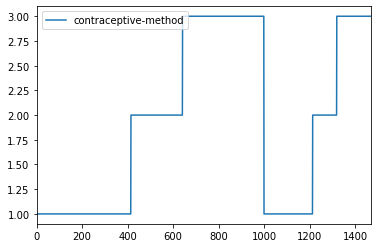

In [279]:
# Let's do some visualizations now
contraceptive_df[['contraceptive-method', 'wife-age']].plot();

In [0]:
# Let's do a crosstab
method_age_cross = pd.crosstab(contraceptive_df['contraceptive-method'], contraceptive_df['wife-age'])

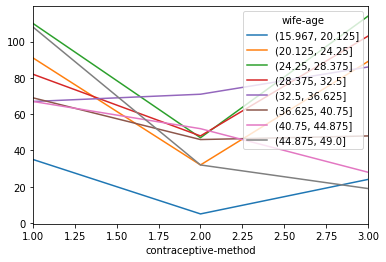

In [289]:
 # Plot a line graph
 method_age_cross.plot();

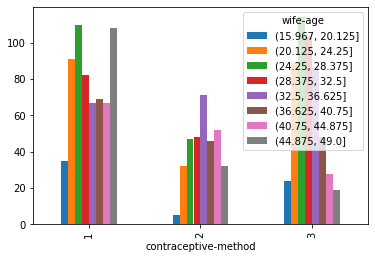

In [291]:
# Plot a bar graph
method_age_cross.plot.bar();

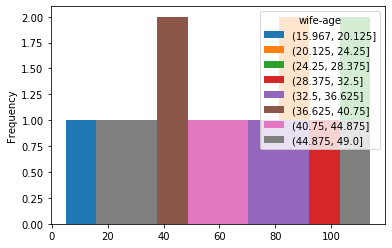

In [293]:
# Plot a histogram
method_age_cross.plot.hist();

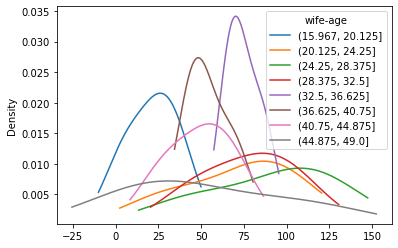

In [294]:
# Plot a density graph
method_age_cross.plot.density();

In [0]:
# Create a second crosstab usiong the other column we cut down
child_method_cross = pd.crosstab(contraceptive_df['contraceptive-method'], contraceptive_df['numb-child-born'])

In [297]:
child_method_cross

numb-child-born       (-0.001, 1.0]  (1.0, 3.0]  (3.0, 4.0]  (4.0, 16.0]
contraceptive-method                                                    
1                               238         184          57          150
2                                46         126          62           99
3                                89         225          78          119

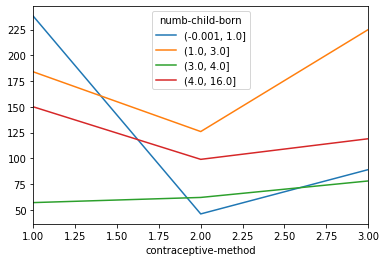

In [298]:
# Plot it!
child_method_cross.plot();

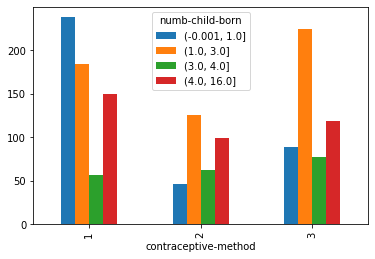

In [299]:
# Now bar plot
child_method_cross.plot.bar();

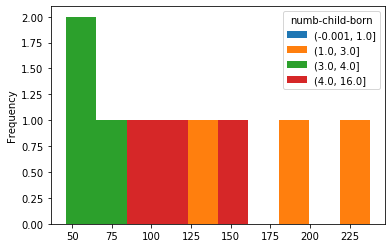

In [300]:
# Histogram time!
child_method_cross.plot.hist();

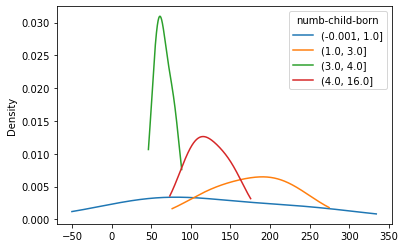

In [301]:
# Finally density
child_method_cross.plot.density();